### Writing count histograms and other smaller updates

- Writing of `point_map.fits` on LSDB
- Length of unmodified catalogs
- Fix to skymap when there are empty partitions and an order is specified

In [1]:
import lsdb
import numpy as np
from lsdb.core.search import BoxSearch
from hats.inspection.visualize_catalog import plot_points

In the context of the PhotoD incubator we generated a HATS catalog at fixed order 5 from the trilegal simulations. 

In [2]:
trilegal = lsdb.read_hats("/mnt/beegfs/scratch/data/TRILEGAL/TRILEGAL_hats/TRILEGAL_level_5_cluster/")

### Catalog's total number of rows

The total number of catalog rows is now given by the **len** attribute. This only works when the catalog has not been modified, as we will see!

In [3]:
len(trilegal)

11433322690

E.g. for testing, we decided to select the box region around stripe 82:

(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel density map - TRILEGAL_level_5_cluster'}>)

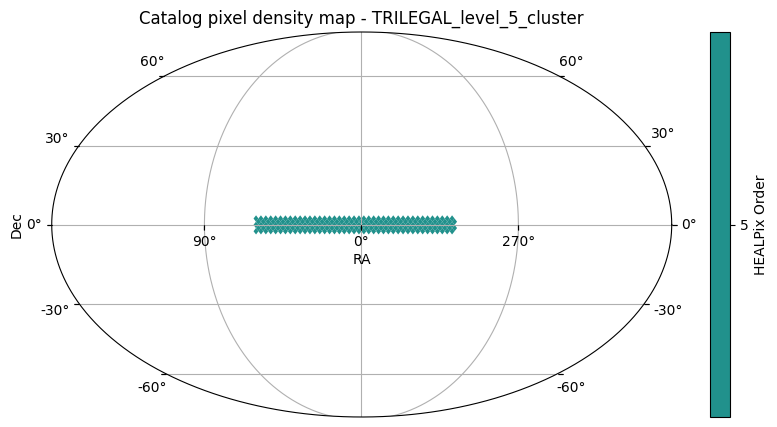

In [4]:
trilegal_s82 = trilegal.box_search(ra=(-52, 60), dec=(-1.266, 1.266))
trilegal_s82.plot_pixels()

The total number of rows for a catalog is now undefined (because it requires executing the Dask tasks), so an error is thrown.

In [5]:
len(trilegal_s82)

ValueError: The number of rows is undetermined because the catalog was modified.

### Skymap when there are empty partitions

This catalog resulted in some empty partitions, after filtering, so we had issues generating its skymap:

In [5]:
trilegal_s82.skymap(lambda df, _: len(df), order=8)

ValueError: shape mismatch: value array of shape (0,33) could not be broadcast to indexing result of shape (0,)

The latest versions of LSDB and HATS contain a fix to this issue:

/home/scampos/photoD/.venv/lib/python3.10/site-packages/hats/inspection/visualize_catalog.py:195: UserWarning: This plot contains HEALPix pixels smaller than a pixel of the plot. Some values may be lost
  warnings.warn(


(<Figure size 1000x500 with 2 Axes>, <WCSAxes: >)

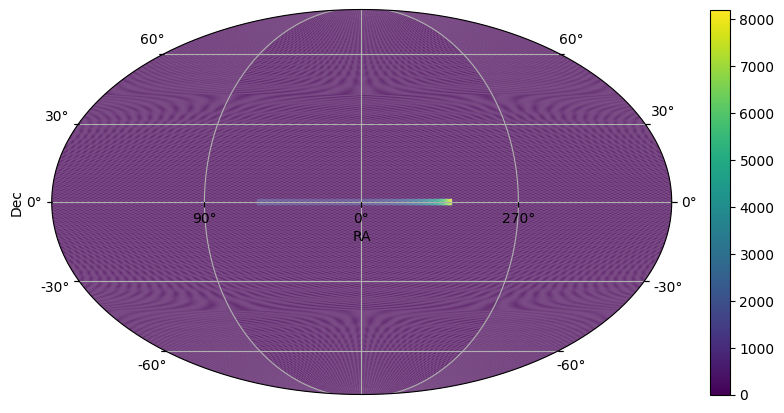

In [6]:
trilegal_s82.skymap(lambda df, _: len(df), order=8)

### Writing the count map histogram

The count map histogram is now written with `to_hats`. It is at the maximum order of the catalog or at order 8, whichever is greater!

In [7]:
trilegal_s82.to_hats("trilegal_s82")

/home/scampos/photoD/.venv/lib/python3.10/site-packages/pydantic/main.py:390: UserWarning: Pydantic serializer warnings:
  Expected `int` but got `int64` with value `10545280` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


In [8]:
%ls trilegal_s82

dataset/  partition_info.csv  point_map.fits  properties


Let's read the catalog again and plot its point map. It matches the previously computed skymap histogram.

/home/scampos/photoD/.venv/lib/python3.10/site-packages/hats/inspection/visualize_catalog.py:195: UserWarning: This plot contains HEALPix pixels smaller than a pixel of the plot. Some values may be lost
  warnings.warn(


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog point density map - TRILEGAL stripe 82'}>)

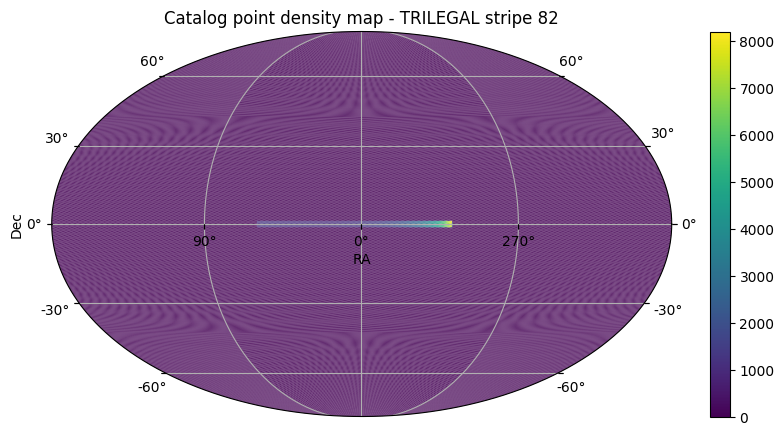

In [9]:
saved_trilegal_s82 = lsdb.read_hats("trilegal_s82")
plot_points(saved_trilegal_s82.hc_structure, plot_title="Catalog point density map - TRILEGAL stripe 82")